## Applied Machine Learning
### Assignment-I
### Introductory Data Analysis Assignment

Date of Submission: 20th January 2025

    Submitted to:                           Submitted by:
    Dr. Shresth Gupta                       Amulya Jain
                                            B. Tech CSE AIML Batch 1
                                            SAP Id: 500122439

### Summary and Findings: 
1.
2. 


### Detailed Analysis below

#### Understanding the Data and Dataset:

**What is Real Estate ?**

Real estate refers to land and any permanent structures attached to it, such as buildings, houses, or other improvements. It plays a crucial role in the economy, as it involves property ownership, investment and development.

**Factors which Affect Real Estate Price (Y)**:

- **X1: Transaction Date**: 
    - This tells the year and time when the property was sold. As Real estate prices often change over time due to Market trends, Seasonality and Property age.

- **X2: House Age**: 
    - This tells age of the house in years as Older houses often cost less and may require more maintenance or renovations. 

- **X3: Distance to the Nearest MRT Station**: 
    - It tells how far the house is from the nearest public transportation (measured in distance units).   
    - Buyers often pay more for better access to MRT stations, especially in urban areas. so Properties closer to public transportation are more convenient for commuting, hence expensive.

- **X4: Number of Convenience Stores**: 
    - It is the count of nearby convenience stores. 
    - More convenience stores means better access to daily necessities which therefore means improved living standards of the area hence increasing property value.

- **X5 & X6: Latitude and Longitude**: 
    - It tells about geographic coordinates that pinpoint the property’s location. 
    - Basically estates which are in prime or desirable locations like near city or amenities will have higher prices.

where **Y: House Price of Unit Area**: The target variable representing the price per unit area.
- A newer house near public transport and convenience stores in a prime location will likely have a higher price.
- A remote, older house with fewer amenities will cost less.

### Assignment Questions

#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np

###  1. Dataset Overview:

####  Load the dataset

In [2]:
path = "Real estate.csv"
df = pd.read_csv(path)

####  Display the first five rows

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Identify the column names and data types

In [4]:
df.ndim

2

In [5]:
df.shape

(414, 8)

In [6]:
df.size

3312

In [7]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [10]:
df.isna()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

#### Dataset Observations:
1. No missing data in any column or row.
2. Upon observing the general information of all the columns:
    - Column "X1 transaction date" is inconsistent due to: 
        - Data Type: float64
        - Preferred Data Type: Datetime data type

In [12]:
# Function to convert fractional year to datetime
def fractional_year_to_date(fractional_year):
    year = int(fractional_year)  # Extract the year
    remainder = fractional_year - year  # Get the fractional part
    days_in_year = 366 if (year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)) else 365  # Leap year check
    days = int(remainder * days_in_year)  # Convert fraction to days
    date = pd.Timestamp(year=year, month=1, day=1) + pd.Timedelta(days=days)  # Add days to Jan 1
    return date

# Apply conversion
df['X1 transaction date'] = df['X1 transaction date'].apply(fractional_year_to_date)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   No                                      414 non-null    int64         
 1   X1 transaction date                     414 non-null    datetime64[ns]
 2   X2 house age                            414 non-null    float64       
 3   X3 distance to the nearest MRT station  414 non-null    float64       
 4   X4 number of convenience stores         414 non-null    int64         
 5   X5 latitude                             414 non-null    float64       
 6   X6 longitude                            414 non-null    float64       
 7   Y house price of unit area              414 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 26.0 KB


#### Dataset Observations:
1. Total Null values in all columns is 0.
2. Column "X1 transaction date" is now consistent with datetime64[ns] Data Type, useful data format for further analysis.


### 2. Statistical Summary:

#### Generate a statistical summary (mean, median, standard deviation, minimum, and maximum) for all numerical columns.

##### We will analyze the dataset through the given parameters: 
- **Mean**: Average value tells the central tendency. We can compare it with the median (50%) to detect skewness.
- **Min/Max**: Shows the range and potential outliers. A large gap suggests variability or possible outliers.
- **Quartiles (25%, 50%, 75%)**: Helps you understand how the data is distributed. A narrow range means most values are similar; a wide range suggests diversity.
- **Standard Deviation (std)**: measures the average deviation of data points from the mean. Indicates the spread of the data & is influenced by extreme values (outliers)

In [14]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013-02-23 20:55:39.130434816,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
min,1.000000,2012-09-01 00:00:00,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012-12-01 00:00:00,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013-03-02 00:00:00,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013-06-02 00:00:00,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013-08-01 00:00:00,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000
std,119.655756,NaN,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488


#### What does this summary tell you about the distribution of house prices and other features?

##### Key Observations which can be made through Summary:

1. **Y house price of unit area (Target Variable)**:
   - **Mean**: The average price is 37.98 per unit area.
   - **Range (Min to Max)**: The range of house prices is from 7.6 to 117.5, indicating significant variation.
   - **Quartiles**:
     - 25th Percentile: 27.7
     - Median (50th Percentile): 38.45
     - 75th Percentile: 46.6
   - **Standard Deviation (std)**: 13.61, showing a moderate spread around the mean.

2. **X1 Transaction Date**:
   - **Range (Min to Max)**: Contains timestamp data. The time range is from September 1, 2012, to August 1, 2013.
   - **Insight**: This will be used to track trends in house prices over time.

3. **X2 House Age**:
   - **Mean**: The average house age is 17.71 years.
   - **Range (Min to Max)**: Ranges from 0 to 43.8 years.
   - **Quartiles**:
     - 25th Percentile: 9.03
     - Median: 16.1
     - 75th Percentile: 28.15
   - **Insight**: The data includes both new (age 0) and older houses. We see most houses are under 30 years old from Quartiles and Range.

4. **X3 Distance to the Nearest MRT Station**:
   - **Mean**: The average distance is 1083.89 meters.
   - **Range (Min to Max)**: The closest is 23.38 meters, and the farthest is 6488 meters.
   - **Quartiles**:
     - 25th Percentile: 289.32 meters
     - Median: 492.23 meters
     - 75th Percentile: 1454.28 meters
   - **Insight**: There is a wide range of distances, with a few properties being much farther from MRT stations, suggesting potential outliers.

5. **X4 Number of Convenience Stores**:
   - **Mean**: On average, there are 4.09 convenience stores nearby.
   - **Range (Min to Max)**: Ranges from 0 to 10 stores.
   - **Quartiles**:
     - 25th Percentile: 1 store
     - Median: 4 stores
     - 75th Percentile: 6 stores
   - **Insight**: Most properties have access to at least one convenience store. Very few have no stores nearby.

6. **X5 Latitude & X6 Longitude**:
   - **Latitudes** range from 24.93207 to 25.01459
   - **Longitudes** range from 121.47353 to 121.56627.
   - **Insight**: The less spread of location properties is limited to a specific area meaning the dataset represents a city or region.

##### General Observations:
- **Distribution**: Most features, especially house age, number of stores and distance to MRT stations, show a spread of values with potential outliers.
- **Relationships**: House prices may correlate with proximity to MRT stations and the number of convenience stores, as these often influence property value.

##### Statistical Observations: 
1. **House Price Distribution**
   - **Interquartile Range (IQR)**: \( Q3 - Q1 = 46.6 - 27.7 = 18.9 \)
   - **Standard Deviation**: 13.61
   **Insight**: The IQR is larger than the standard deviation, suggesting that the data may be skewed or contain outliers.

2. **Distance to MRT Stations**
   - **Wide Range**: From 23.38 meters to 6488 meters
   - **Quartile Insights**: 75% of properties are within 1454 meters from an MRT station, which can be used to distinguish typical properties from remote ones.

   **Insight**: Properties that are far from MRT stations (above the 75th percentile) are likely to be priced lower due to less accessibility, which could be factored into pricing models.
- Feature: "X3 Distance to the Nearest MRT Station"
   Wide Range: Distance varies from 23.38 meters to 6488 meters.
   Insight: Some houses are very far, indicating outliers or less desirable locations.
   Quartile Insights:
   Most properties are within 1454 meters (75th percentile). Use this to identify "typical" cases.
   Anything above this might represent remote properties that are less expensive.


### 3. Data Cleaning:

##### Check for missing values in the dataset.

In [15]:
df.isna()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


In [16]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

##### Check for duplicate values in the dataset.

In [17]:
duplicates = df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool


In [18]:
duplicates_count = df.duplicated().value_counts()
duplicates_count

False    414
Name: count, dtype: int64

### 4. Univariate Analysis:

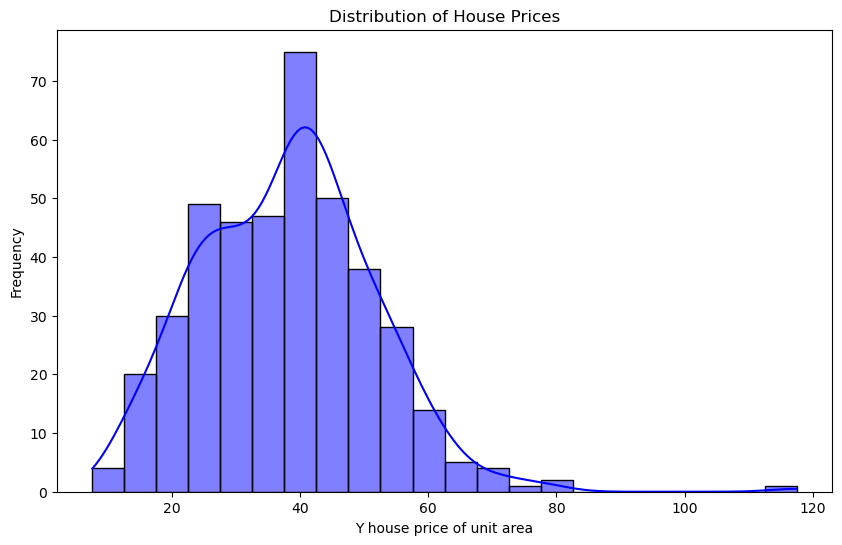

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Y house price of unit area', kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Y house price of unit area')
plt.ylabel('Frequency')
plt.show()


In [20]:
import scipy

In [26]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(df['Y house price of unit area'])
print(f"Skewness of house prices: {skewness}")


Skewness of house prices: -0.10366797406723635


Interpretation of Skewness
Skewness ≈ 0: The data is approximately symmetrical (normal distribution).
Positive Skewness (Skewness > 0):
Right-tailed distribution (long tail on the right).
More data points concentrated on the left.
Negative Skewness (Skewness < 0):
Left-tailed distribution (long tail on the left).
More data points concentrated on the right.
Thresholds for Skewness
-0.5 to 0.5: Approximately symmetrical (no transformation needed).
0.5 to 1 or -0.5 to -1: Moderately skewed (transformation may help).
>1 or <-1: Highly skewed (transformation recommended).
The skewness value of house prices is 0.5977, which is a measure of asymmetry in the distribution of data.Since it is 0.5977, the data is moderately positively skewed.


To reduce positive skewness:

Logarithmic Transformation:
Use for data with a large range of values.

Square Root Transformation:
Useful for mildly skewed data.

Box-Cox Transformation:
Flexible and automatically finds the best transformation parameter.

Reciprocal Transformation:
Effective for reducing skewness but can amplify differences in smaller values.


In [27]:
df_new = df.copy()
df_new

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,6.156298
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,6.496153
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,6.877500
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,7.402702
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,6.565059
...,...,...,...,...,...,...,...,...
409,410,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,3.924283
410,411,2012-09-01,5.6,90.45606,9,24.97433,121.54310,7.071068
411,412,2013-04-02,18.8,390.96960,7,24.97923,121.53986,6.371813
412,413,2013-01-01,8.1,104.81010,5,24.96674,121.54067,7.245688


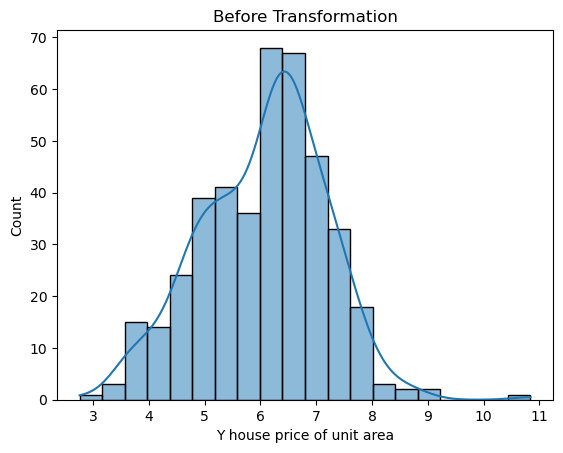

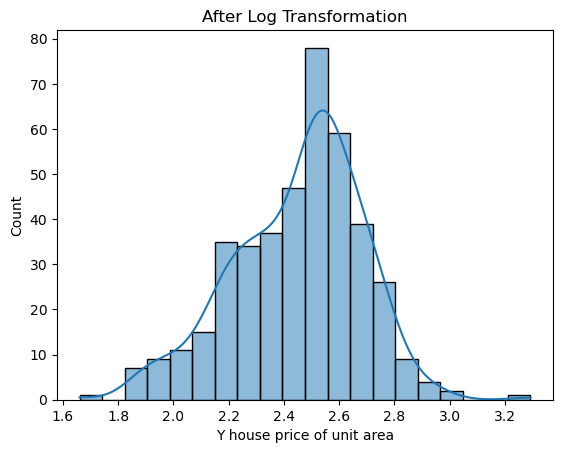

In [28]:
sns.histplot(df_new['Y house price of unit area'], kde=True)
plt.title("Before Transformation")
plt.show()

df_new['Y house price of unit area'] = np.sqrt(df_new['Y house price of unit area'])
sns.histplot(df_new['Y house price of unit area'], kde=True)
plt.title("After Log Transformation")
plt.show()

In [29]:
df_new

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,2.481189
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,2.548755
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,2.622499
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,2.720791
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,2.562237
...,...,...,...,...,...,...,...,...
409,410,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,1.980980
410,411,2012-09-01,5.6,90.45606,9,24.97433,121.54310,2.659148
411,412,2013-04-02,18.8,390.96960,7,24.97923,121.53986,2.524245
412,413,2013-01-01,8.1,104.81010,5,24.96674,121.54067,2.691782


### 5. Feature Exploration: